In [3]:
import pandas as pd

hourlySteps = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/hourlySteps_merged.csv')
dailySteps = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/dailySteps_merged.csv')
minuteSleep = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/minuteSleep_merged.csv')
sleepDay = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/sleepDay_merged.csv')
dailySteps.groupby('Id').sum()
dailySteps.describe()
nsd = sleepDay[['Id','SleepDay','TotalMinutesAsleep']]
#nsd[nsd['TotalMinutesAsleep'] >= 1]
#df[df['age-years'] >= 10]
#sleepDay.head(2)
StepTotal = dailySteps[['Id','ActivityDay','StepTotal']]
StepTotal.columns = ['Id2','ActivityDay','StepTotal']
nsd
StepTotal

,Id2,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [4]:
# Pair ID and Time to Minute asleep and Steps

def new_activity(row):
    row.SleepDay = row.SleepDay[:9]
    return row
sleep_day=sleepDay.apply(new_activity, axis="columns").rename(columns={"SleepDay":"ActivityDate"})
sleepcut = sleep_day[['Id','ActivityDate','TotalMinutesAsleep']]
sleepcut
sleepInBed = sleep_day[['Id','ActivityDate','TotalTimeInBed']]

#final = pd.merge(nsd, StepTotal, left_on=['Id','SleepDay','TotalMinutesAsleep'], right_on=['Id2','ActivityDay','StepTotal'])
#final = pd.merge(sleepDay, dailySteps, left_on=['Id','SleepDay','TotalMinutesAsleep'], right_on=['Id','ActivityDay','StepTotal'])
#final = pd.merge(nsd, StepTotal)


Coefficients:  [[-0.00413946]]
Intercept:  [455.28734926]


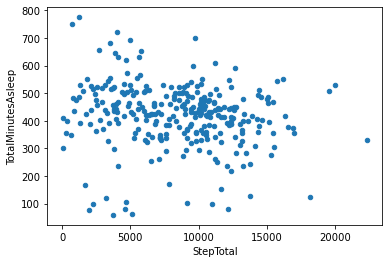

In [88]:
from sklearn import linear_model

sleepStep = sleepcut.merge(StepTotal, left_on=['Id','ActivityDate'], right_on=['Id2','ActivityDay'],copy=False)
sleepStepCut = sleepStep[['Id','TotalMinutesAsleep','StepTotal']]
sleepStepCut.plot.scatter(x='StepTotal',y='TotalMinutesAsleep')
regr = linear_model.LinearRegression()
regr.fit(sleepStep[['StepTotal']],sleepStep[['TotalMinutesAsleep']])
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00397453]]
Intercept:  [491.73981623]


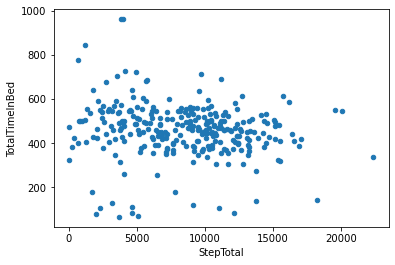

In [16]:
from sklearn import linear_model

sleepStep = sleepInBed.merge(StepTotal, left_on=['Id','ActivityDate'], right_on=['Id2','ActivityDay'],copy=False)
sleepStepCut = sleepStep[['Id','TotalTimeInBed','StepTotal']]
plot = sleepStepCut.plot.scatter(x='StepTotal',y='TotalTimeInBed')
plot.
regr = linear_model.LinearRegression()
regr.fit(sleepStep[['StepTotal']],sleepStep[['TotalTimeInBed']])
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)



(-0.18169469789999546, 0.0016956316026592502)

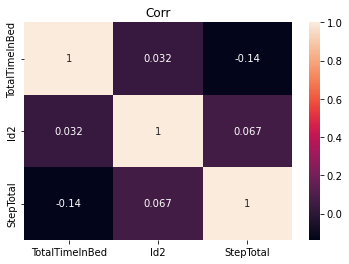

In [10]:
from sklearn import linear_model
from scipy.stats import pearsonr 
from scipy.stats import spearmanr 
import seaborn as sns

sleepStep = sleepInBed.merge(StepTotal, left_on=['Id','ActivityDate'], right_on=['Id2','ActivityDay'],copy=False)
corr = sleepStep.drop(columns=["Id"], inplace = False).corr()
BedAndStep = sleepStep.drop(columns=["ActivityDate","Id","Id2","ActivityDay"], inplace = False)
plot = sns.heatmap(corr, annot = True)
plot.set_title("Corr")
a = BedAndStep["TotalTimeInBed"].transpose()
b = BedAndStep["StepTotal"].transpose()
stat, p = spearmanr(a,b)
stat, p

In [128]:
a

0      346
1      407
2      442
3      367
4      712
      ... 
291    360
292    428
293    416
294    406
295    360
Name: TotalTimeInBed, Length: 296, dtype: int64

In [125]:
b

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
StepTotal,13162,10735,9762,12669,9705,15506,10544,9819,14371,10039,...,1320,1219,2483,3147,4068,5245,1758,6157,8360,7174


In [126]:
df1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]   

df2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

df2

[0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.35, -1.578, -3.537, -1.579]

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(df.biking, df[['heart.disease']],  color='blue') 
plt.plot(df.biking, regr.coef_[0][0]*df.biking + regr.intercept_[0], '-r') 
plt.xlabel("Biking") 
plt.ylabel("Hear Disease")


Text(0.5, 1.0, 'nets')

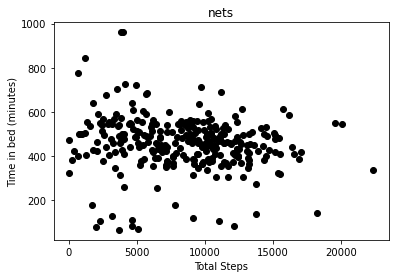

In [19]:
import matplotlib.pyplot as plt 

plt.scatter(sleepStep[['StepTotal']], sleepStep[['TotalTimeInBed']],  color='black') 
#plt.plot(sleepStep[['StepTotal']], regr.coef_[0][0]*sleepStep[['StepTotal']] + regr.intercept_[0], '-r') 
plt.xlabel("Total Steps") 
plt.ylabel("Time in bed (minutes)")
plt.title('nets')

In [18]:
r = -0.18169469789999546
p = 0.0016956316026592502